In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline

In [2]:
from google.colab import drive 
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [3]:
loans = pd.read_csv('/content/gdrive/My Drive/Lending Capstone Project/accepted_2007_to_2018Q4.csv.gz')  

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0,19,49,59,118,129,130,131,134,135,136,139,145,146,147) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
#making the column transformations  

years = loans['emp_length'] 
years = years.str.extract(r'(\d+)') 
loans['emp_length'] = [float(x) for x in years[0]]
loans['year_issued'] = pd.to_datetime(loans['issue_d']).dt.year
loans['month_issued'] = pd.to_datetime(loans['issue_d']).dt.month  
loans['loan_status'] = loans['loan_status'].str.replace('Does not meet the credit policy. Status:', '') 
terms = loans['term'] 
terms = terms.str.extract(r'(\d+)')
loans['term'] = [float(x) for x in terms[0]] 
times = (pd.to_datetime(loans['last_pymnt_d']) - pd.to_datetime(loans['issue_d'])) / np.timedelta64(1, 'M') 
loans['loan_duration'] = times.round()
loans['profits'] = (loans['total_pymnt'] - loans['loan_amnt']) / loans['loan_amnt'] 

In [5]:
finished_loans = loans.loc[(loans.loan_status == 'Charged Off') | (loans.loan_status == 'Fully Paid') | (loans.loan_status == 'Default')] 

In [6]:
AB_loans = finished_loans.loc[(finished_loans.grade == 'A') | (finished_loans.grade == 'B')]

In [ ]:
AB_loans.shape

(628295, 155)

In [ ]:
AB_loans['sub_grade'].value_counts()

B4    83276
B5    82639
B3    81901
B2    74080
B1    71206
A5    64056
A4    52255
A1    43682
A3    38010
A2    37190
Name: sub_grade, dtype: int64

In [7]:
#begin importing the sklearn modules for transforming & feature scaling here 
#columns we are not looking at are issued date 
AB_loans = AB_loans[['annual_inc', 'application_type', 'dti', 'issue_d', 'earliest_cr_line', 'emp_length', 'fico_range_high', 'fico_range_low', 'funded_amnt', 'home_ownership', 'inq_fi', 'inq_last_12m', 'installment', 'int_rate', 'loan_amnt', 'open_acc', 'percent_bc_gt_75', 'pub_rec', 'pub_rec_bankruptcies', 'purpose', 'sub_grade', 'tax_liens', 'total_acc', 'revol_bal', 'delinq_amnt', 'delinq_2yrs', 'mths_since_last_delinq', 'mths_since_last_major_derog', 'loan_status']]

In [8]:
AB_loans.isnull().sum()

annual_inc                          4
application_type                    0
dti                               127
issue_d                             0
earliest_cr_line                   21
emp_length                      35420
fico_range_high                     0
fico_range_low                      0
funded_amnt                         0
home_ownership                      0
inq_fi                         378831
inq_last_12m                   378832
installment                         0
int_rate                            0
loan_amnt                           0
open_acc                           21
percent_bc_gt_75                31805
pub_rec                            21
pub_rec_bankruptcies              461
purpose                             0
sub_grade                           0
tax_liens                          52
total_acc                          21
revol_bal                           0
delinq_amnt                        21
delinq_2yrs                        21
mths_since_l

In [9]:
D = (pd.to_datetime(AB_loans['issue_d']) - pd.to_datetime(AB_loans['earliest_cr_line'])) / np.timedelta64(1, 'Y') 
AB_loans['cr_yeargap'] = D.round() 

In [10]:
AB_loans['loan_status'] = AB_loans['loan_status'].str.replace("Default", "Charged Off")

In [11]:
AB_loans['avg_fico_score'] = (AB_loans['fico_range_low'] + AB_loans['fico_range_high']) / 2

In [12]:
AB_loans['mths_since_last_delinq'].fillna(-99, inplace = True) 
AB_loans['mths_since_last_major_derog'].fillna(-99, inplace = True) 
AB_loans['inq_fi'].fillna(-99, inplace = True)  
AB_loans['inq_last_12m'].fillna(-99, inplace = True) 
AB_loans['percent_bc_gt_75'].fillna(-99, inplace = True)
AB_loans['emp_length'].fillna(0, inplace = True) 
AB_loans['dti'].fillna(-99, inplace = True) 
AB_loans['delinq_amnt'].fillna(-99, inplace = True) 
AB_loans['delinq_2yrs'].fillna(-99, inplace = True) 
AB_loans['cr_yeargap'].fillna(-99, inplace = True)
AB_loans['tax_liens'].fillna(-99, inplace = True) 
AB_loans['pub_rec'].fillna(-99, inplace = True) 
AB_loans['pub_rec_bankruptcies'].fillna(-99, inplace = True) 
AB_loans['open_acc'].fillna(-99, inplace = True) 
AB_loans['total_acc'].fillna(-99, inplace = True) 
AB_loans['earliest_cr_line'].fillna(-99, inplace = True)  

In [13]:
AB_loans = AB_loans.dropna(subset= ['annual_inc'])
AB_loans.isna().sum()

annual_inc                     0
application_type               0
dti                            0
issue_d                        0
earliest_cr_line               0
emp_length                     0
fico_range_high                0
fico_range_low                 0
funded_amnt                    0
home_ownership                 0
inq_fi                         0
inq_last_12m                   0
installment                    0
int_rate                       0
loan_amnt                      0
open_acc                       0
percent_bc_gt_75               0
pub_rec                        0
pub_rec_bankruptcies           0
purpose                        0
sub_grade                      0
tax_liens                      0
total_acc                      0
revol_bal                      0
delinq_amnt                    0
delinq_2yrs                    0
mths_since_last_delinq         0
mths_since_last_major_derog    0
loan_status                    0
cr_yeargap                     0
avg_fico_s

In [14]:
AB_loans[['home_ownership', 'application_type', 'purpose', 'sub_grade']] =  AB_loans[['home_ownership', 'application_type', 'purpose', 'sub_grade']].astype('category')


In [15]:
AB_loans['home_ownership_cat'] =  AB_loans['home_ownership'].cat.codes 
AB_loans['application_type_cat'] = AB_loans['application_type'].cat.codes 
AB_loans['purpose_cat'] = AB_loans['purpose'].cat.codes 
AB_loans['sub_grade_cat'] = AB_loans['sub_grade'].cat.codes

In [16]:
AB_loans['loan_status'] = (AB_loans["loan_status"] == "Charged Off").astype(np.int)
 
AB_loans.head()

,annual_inc,application_type,dti,issue_d,earliest_cr_line,emp_length,fico_range_high,fico_range_low,funded_amnt,home_ownership,inq_fi,inq_last_12m,installment,int_rate,loan_amnt,open_acc,percent_bc_gt_75,pub_rec,pub_rec_bankruptcies,purpose,sub_grade,tax_liens,total_acc,revol_bal,delinq_amnt,delinq_2yrs,mths_since_last_delinq,mths_since_last_major_derog,loan_status,cr_yeargap,avg_fico_score,home_ownership_cat,application_type_cat,purpose_cat,sub_grade_cat
2,63000.0,Joint App,10.78,Dec-2015,Aug-2000,10.0,699.0,695.0,20000.0,MORTGAGE,2.0,1.0,432.66,10.78,20000.0,6.0,50.0,0.0,0.0,home_improvement,B4,0.0,18.0,7869.0,0.0,0.0,-99.0,-99.0,0,15.0,697.0,1,1,4,8
6,180000.0,Individual,14.67,Dec-2015,Jun-1990,10.0,684.0,680.0,20000.0,MORTGAGE,1.0,1.0,637.58,9.17,20000.0,12.0,100.0,0.0,0.0,debt_consolidation,B2,0.0,27.0,87329.0,0.0,0.0,49.0,-99.0,0,26.0,682.0,1,0,2,6
7,85000.0,Individual,17.61,Dec-2015,Feb-1999,10.0,709.0,705.0,20000.0,MORTGAGE,1.0,2.0,631.26,8.49,20000.0,8.0,0.0,0.0,0.0,major_purchase,B1,0.0,15.0,826.0,0.0,1.0,3.0,3.0,0,17.0,707.0,1,0,6,5
8,85000.0,Individual,13.07,Dec-2015,Apr-2002,6.0,689.0,685.0,10000.0,RENT,2.0,1.0,306.45,6.49,10000.0,14.0,28.6,1.0,1.0,credit_card,A2,0.0,23.0,10464.0,0.0,0.0,-99.0,-99.0,0,14.0,687.0,5,0,1,1
9,42000.0,Individual,34.80,Dec-2015,Nov-1994,10.0,704.0,700.0,8000.0,MORTGAGE,0.0,1.0,263.74,11.48,8000.0,8.0,33.3,0.0,0.0,credit_card,B5,0.0,18.0,7034.0,0.0,0.0,75.0,75.0,0,21.0,702.0,1,0,1,9


In [17]:
AB_loans_clean = AB_loans.drop(['issue_d', 'earliest_cr_line', 'fico_range_high', 'fico_range_low', 
                        'home_ownership', 'application_type', 'purpose', 'sub_grade'], axis = 1)  


In [18]:
AB_loans_clean['loan_status'].mean()

0.10643953200029922

In [19]:
from sklearn.model_selection import train_test_split, cross_val_score  

train_data, test_data = train_test_split(AB_loans_clean, train_size = 0.7, test_size= 0.3, random_state = 42)

In [20]:
 #Number of Ones
 train_data['loan_status'].sum()

46743

In [21]:
#Number of Zeros 
train_data.shape[0] -  train_data['loan_status'].sum()

393060

In [23]:
#WE UPSAMPLE THE DATA IN ORDER TO IMPROVE THE PREDICTIONS FOR DEFAULTS
from sklearn.utils import resample 
major = train_data[train_data.loan_status == 0] 
minor = train_data[train_data.loan_status == 1] 

minority_upsampled = resample(minor, replace = True, n_samples = 393060, random_state = 42) 

#majority_downsampled = resample(major, replace = False, n_samples = 250000, random_state = 42, stratify = major['sub_grade_cat'])

sampled_data = pd.concat([minority_upsampled, major])

train_labels = sampled_data['loan_status'] 
train_feats = sampled_data.drop('loan_status', axis= 1)


In [24]:
test_feats = test_data.drop('loan_status', axis = 1) 
test_labels = test_data['loan_status']

In [25]:
sampled_data.shape

(786120, 27)

In [26]:
sampled_data['loan_status'].mean()

0.5

In [ ]:
##TRANISITONING TO XGBOOST  

In [27]:
from sklearn.metrics import roc_curve, precision_recall_curve, auc, make_scorer, recall_score, accuracy_score, precision_score, confusion_matrix
from sklearn.model_selection import GridSearchCV, StratifiedKFold


In [ ]:
import xgboost as xgb 
from sklearn.metrics import accuracy_score

#xgb_clf = xgb.XGBClassifier(n_estimators = 3000, subsample= 0.7, learning_rate= 0.15, random_state= 42)   

xgb_clf = xgb.XGBClassifier(n_estimators = 7000, subsample= 0.7, learning_rate= 0.15, random_state= 42)   
%time xgb_clf.fit(train_feats, train_labels)  

train_preds = xgb_clf.predict(train_feats)
test_preds = xgb_clf.predict(test_feats)

CPU times: user 1h 48min 49s, sys: 709 ms, total: 1h 48min 50s
Wall time: 1h 48min 51s


In [ ]:
print('Training Accuracy %.2f' %(xgb_clf.score(train_feats, train_labels))) 
print(confusion_matrix(train_labels, train_preds))

Training Accuracy 0.76
[[284653 108407]
 [ 83480 309580]]


In [ ]:
print('Testing Accuracy %.2f' %(xgb_clf.score(test_feats, test_labels))) 
print(confusion_matrix(test_labels, test_preds))

Testing Accuracy 0.68
[[117373  50983]
 [  9707  10425]]


Text(0.5, 1.0, 'Feature Importances of the XGBoost Model ')

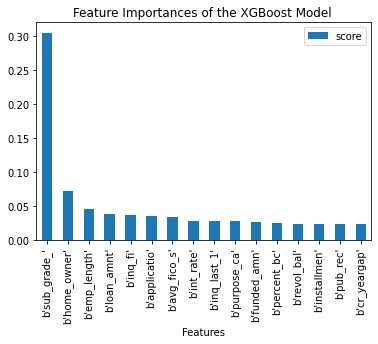

In [ ]:
feature_importance = list(zip(train_feats.columns, xgb_clf.feature_importances_))
dtype = [('feature', 'S10'), ('importance', 'float')]
feature_importance = np.array(feature_importance, dtype=dtype)
feature_sort = np.sort(feature_importance, order='importance')[::-1]
name, score = zip(*list(feature_sort))
pd.DataFrame({'name':name,'score':score})[:16].plot.bar(x='name', y='score') 
plt.xlabel('Features') 
plt.title('Feature Importances of the XGBoost Model ')

In [ ]:
import pickle 

with open('/content/gdrive/My Drive/xgboost.pickle', 'wb') as fid:
     pickle.dump(xgb_clf, fid)


In [ ]:
xgb_clf.predict(test_feats)

array([0, 1, 1, ..., 1, 0, 1])

In [ ]:
xgb_clf.get_params

<bound method XGBModel.get_params of XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.15, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=7000, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.7, verbosity=1)>

In [28]:
import pickle  

with open('/content/gdrive/My Drive/xgboost.pickle', 'rb') as fid:
     model = pickle.load(fid)

In [29]:
model.get_params

<bound method XGBModel.get_params of XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.15, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=nan, n_estimators=7000, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.7, verbosity=1)>

In [30]:
train_preds = model.predict(train_feats) 
test_preds = model.predict(test_feats)

In [32]:
print("Training Data Performance")
print('Training Accuracy %.2f' %(model.score(train_feats, train_labels))) 
print(confusion_matrix(train_labels, train_preds)) 
print("-"*50) 
print("Test Data Performance")  
print('Testing Accuracy %.2f' %(model.score(test_feats, test_labels))) 
print(confusion_matrix(test_labels, test_preds))

Training Data Performance
Training Accuracy 0.76
[[284653 108407]
 [ 83480 309580]]
--------------------------------------------------
Test Data Performance
Testing Accuracy 0.68
[[117373  50983]
 [  9707  10425]]


In [36]:
train_scores = model.predict_proba(train_feats) 

fpr, tpr, thresholds = roc_curve(train_labels, train_scores[:, 1])

Text(0.5, 1.0, 'Reciever Operator Curve of XGBoost Model')

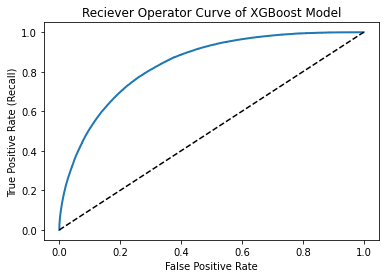

In [39]:
plt.plot(fpr, tpr, linewidth = 2) 
plt.plot([0,1], [0,1], 'k--') 
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate (Recall)') 
plt.title('Reciever Operator Curve of XGBoost Model') 